# Plotting and analyzing ASI mosaics

In [21]:
from datetime import datetime
    
import matplotlib.pyplot as plt
import matplotlib.colors
import aacgmv2
import numpy as np

import asilib
import asilib.asi
import asilib.map

print(f'asilib version: {asilib.__version__}')

asilib version: 0.18.1


We first create an `asilib.Imagers()` object consisting of TREx-RGB `asilib.Imagers()` defined a list of location_codes.

In [2]:
asilib.asi.trex.trex_rgb_info()

,array,location_code,name,latitude,longitude
0,TREx_RGB,ATHA,Athabasca,54.60,-113.64
1,TREx_RGB,FSMI,Fort Smith,60.03,-111.93
2,TREx_RGB,GILL,Gillam,56.38,-94.64
3,TREx_RGB,LUCK,Lucky Lake,51.15,-107.26
4,TREx_RGB,PINA,Pinawa,50.26,-95.87
5,TREx_RGB,RABB,Rabbit Lake,58.23,-103.68


In [13]:
time = datetime(2021, 11, 4, 7, 3, 51)
location_codes = ['FSMI', 'LUCK', 'RABB', 'PINA', 'GILL']
map_alt = 110
min_elevation = 10

In [14]:
_imagers = []

for location_code in location_codes:
    _imagers.append(asilib.asi.trex.trex_rgb(location_code, time=time, alt=map_alt))

asis = asilib.Imagers(_imagers)

Plot a TREx-RGB mosaic with and without AACGM magnetic latitude contours.

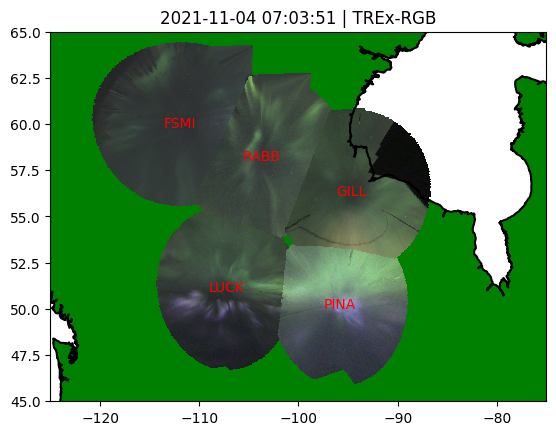

In [50]:
lon_bounds=(-125, -75)
lat_bounds=(45, 65)
ax = asilib.map.create_simple_map(lon_bounds=lon_bounds, lat_bounds=lat_bounds)
asis.plot_map(ax=ax, overlap=False, min_elevation=min_elevation)
plt.title(f'{time} | TREx-RGB');

Text(0.5, 1.0, '2021-11-04 07:03:51 | TREx-RGB | AACGM lat contours')

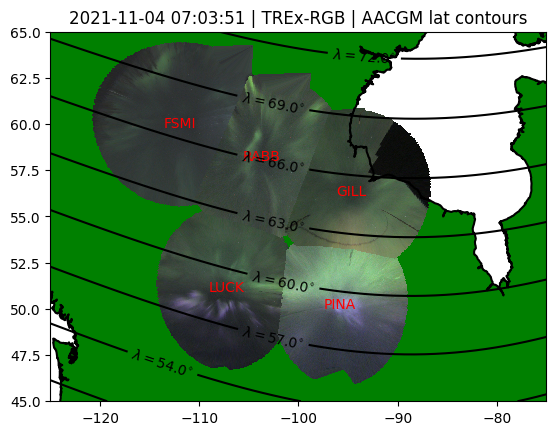

In [51]:
lat_grid, lon_grid = np.meshgrid(np.linspace(*lat_bounds), np.linspace(*lon_bounds))
# Need to pass flattened arrays since aacgmv2 does not work with n-D arrays.
aacgm_lat_grid, aacgm_lon_grid, _ = aacgmv2.wrapper.convert_latlon_arr(
    lat_grid.flatten(), lon_grid.flatten(), 110, time, method_code='G2A'
    )
aacgm_lat_grid = aacgm_lat_grid.reshape(lat_grid.shape)
aacgm_lon_grid = aacgm_lon_grid.reshape(lon_grid.shape)

ax = asilib.map.create_simple_map(lon_bounds=lon_bounds, lat_bounds=lat_bounds)
asis.plot_map(ax=ax, overlap=False, min_elevation=min_elevation)
cs = plt.contour(lon_grid, lat_grid, aacgm_lat_grid, colors='k')
ax.clabel(cs, inline=True, fontsize=10, fmt=lambda x: f'$\lambda = {{{x}}}^{{\circ}}$')
plt.title(f'{time} | TREx-RGB | AACGM lat contours')

In [6]:

# lat_lon_points, intensities = asis.get_points(min_elevation=min_elevation)

# fig = plt.figure(figsize=(12,5))
# ax = asilib.map.create_simple_map(
#     lon_bounds=(-140, -60), lat_bounds=(40, 82), fig_ax=(fig, 121)
#     )
# bx = asilib.map.create_simple_map(
#     lon_bounds=(-140, -60), lat_bounds=(40, 82), fig_ax=(fig, 122)
#     )
# asis.plot_map(ax=ax, overlap=False, min_elevation=min_elevation)
# bx.scatter(lat_lon_points[:, 1], lat_lon_points[:, 0], c=intensities, 
#             norm=matplotlib.colors.LogNorm())
# ax.text(0.01, 0.99, f'(A) Mosaic using Imagers.plot_map()', transform=ax.transAxes, 
#         va='top', fontweight='bold', color='red')
# bx.text(0.01, 0.99, f'(B) Mosaic from Imagers.get_points() scatter', transform=bx.transAxes,
#         va='top', fontweight='bold', color='red')
# fig.suptitle('Donovan et al. 2008 | First breakup of an auroral arc')
# plt.tight_layout()